# 1. 잘못된 방식으로 순환하기

## 1-1. (드물지만) 순환을 위해 목록 생성하기

In [2]:
from random import randrange

In [11]:
word_list = [word.rstrip() for word in open('data/sowpods')]

In [14]:
def get_word(wordlist):
    return wordlist[randrange(0, len(word_list))]

In [22]:
# 생성된 항목에서 목록 생성하기
words = []
while True:
    word = get_word(word_list)
    if len(words) == 10000:
        break
    words.append(word)

In [23]:
# 단어를 수비학적인 마법 숫자로 변환하기
def word_number(word):
    magic = 0
    for letter in word:
        magic += 1 + ord(letter) - ord('a')
    return magic

In [24]:
import matplotlib.pyplot as plt

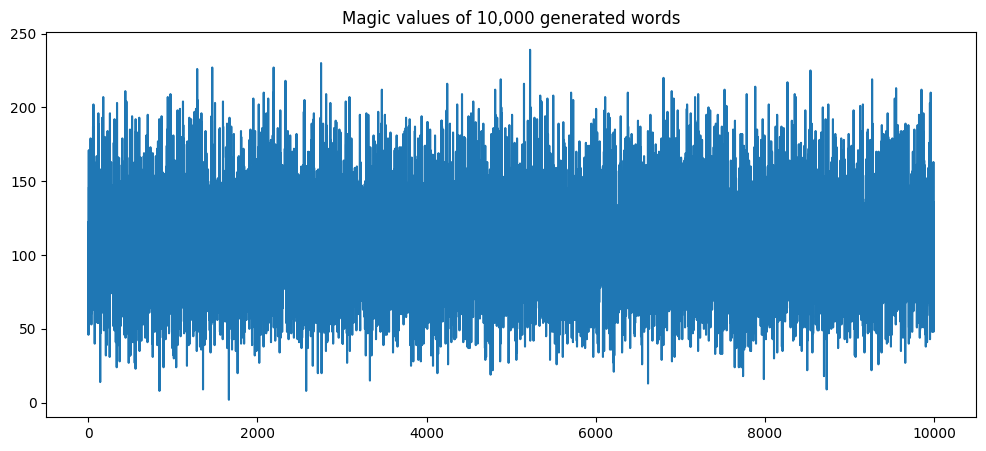

In [27]:
plt.figure(figsize=(12, 5))
plt.plot([word_number(word) for word in words])
plt.title(f"Magic values of {len(words):,} generated words")
plt.show()

In [30]:
# 생성기에서 필요한 것만 그떄그때 계산하기
def word_numbers(src):
    while (word := get_word(word_list)) is not None:
        yield word_number(word)

- '단어'가 훨씬 더 크고 메모리를 많이 소비하는 객체였다면 위와 같은 방식의 코드는 메모리를 상당히 절약할 수 있다.
- 파이썬의 := 연산자는 **Walrus Operator(월러스 연산자)**라고 불리며, 변수 할당과 표현식 평가를 동시에 할 수 있게 해준다. 이 연산자는 Python 3.8부터 도입되었다.
- 일반적으로 우리는 변수를 먼저 할당하고 그 변수를 사용하는데, := 연산자는 할당과 평가를 한 줄에서 동시에 할 수 있도록 도와준다.

## 1-2. 색인을 순환하는 대신 `enumerate()` 사용하기

## 1-3. `dict.items()`가 필요할 경우 `dict.keys()`로 순환하지 않기

```python
for key in my_dict:
    process(key, my_dict[key])
```
- 키를 순환하고 싶다면 그냥 위와 같이 사용하면 된다.

```python
for key in my_dict:
    if rare_condition(key):
        val = my_dict[key]
        process(key, val)
```
- 파이썬 객체는 참조를 통해 접근한다. 즉, 순환 변수에 기존 객체의 참조를 할당할 뿐 실제로 객체를 복사하거나 생서하지는 않는다. 따라서 위와 같이 처리하지 않고 아래와 같이 처리할 수 있다.

```python
for key, val in my_dict.items():
    if rare_condition(key):
        process(key, val)
```